In [ ]:
from google.colab import files
uploaded = files.upload()

Saving student_performances.csv to student_performances (1).csv


# In this tutorial you are given a task of classifying students grades bases on various properties of the students and their families. The students can have 5 kinds of grades - Excellent, Very good, Good, Satisfactory, and poor.

# You need to develop different classifiers and determine which one of them give best performaces on various metrices.

# Import Libraries.
## I have imported few new libraries for this week  but you need to import rest of them.

In [4]:
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Your code to import all the relevant libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Read and display dataset.

In [5]:
# Your code to read data
dataset = pd.read_csv('student_performances.csv')  

# Your code to print first few samples of the dataset.
dataset.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,grades
0,F,18,U,GT3,A,4,4,at_home,teacher,course,...,no,no,4,3,4,1,1,3,6,poor
1,F,17,U,GT3,T,1,1,at_home,other,course,...,yes,no,5,3,3,1,1,3,4,poor
2,F,15,U,LE3,T,1,1,at_home,other,other,...,yes,no,4,3,2,2,3,3,10,satisfactory
3,F,15,U,GT3,T,4,2,health,services,home,...,yes,yes,3,2,2,1,1,5,2,very good
4,F,16,U,GT3,T,3,3,other,other,home,...,no,no,4,3,2,1,2,5,4,satisfactory


# Print the information about the dataset.

## You need to convert all the object datatypes (except output variable - grades) to the numbers using either labelencoding or one hot encoding.

In [6]:
# Your code to print the key information about the datset. Use - .info method.

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         395 non-null    object
 1   age         395 non-null    int64 
 2   address     395 non-null    object
 3   famsize     395 non-null    object
 4   Pstatus     395 non-null    object
 5   Medu        395 non-null    int64 
 6   Fedu        395 non-null    int64 
 7   Mjob        395 non-null    object
 8   Fjob        395 non-null    object
 9   reason      395 non-null    object
 10  guardian    395 non-null    object
 11  traveltime  395 non-null    int64 
 12  studytime   395 non-null    int64 
 13  failures    395 non-null    int64 
 14  schoolsup   395 non-null    object
 15  famsup      395 non-null    object
 16  paid        395 non-null    object
 17  activities  395 non-null    object
 18  nursery     395 non-null    object
 19  higher      395 non-null    object
 20  internet  

# Converting the columns  ['Fjob', 'Mjob', 'reason', 'guardian'] into one hot vectors.

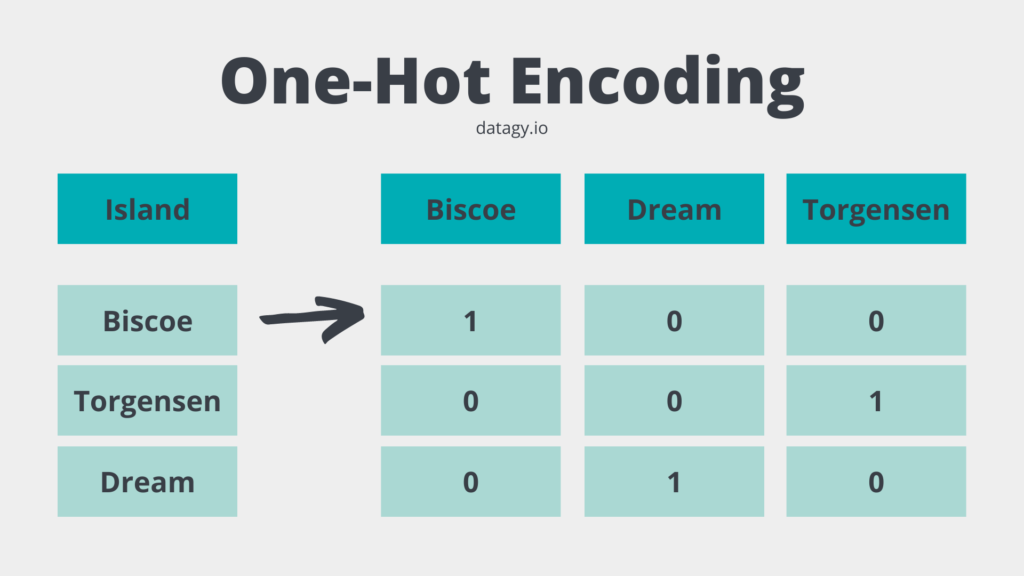

In [7]:
data = pd.get_dummies(dataset, columns = ['Fjob', 'Mjob', 'reason', 'guardian'])


# Note that you can also use sklearn.preprocessing.OneHotEncoder instead of pd.get_dummies.

# Next, print the first few rows of the data (dataset have been stored in data in previous cell).

In [8]:
# Your code to print first few rows of the data.

data.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,Mjob_other,Mjob_services,Mjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,F,18,U,GT3,A,4,4,2,2,0,...,False,False,False,True,False,False,False,False,True,False
1,F,17,U,GT3,T,1,1,1,2,0,...,False,False,False,True,False,False,False,True,False,False
2,F,15,U,LE3,T,1,1,1,2,3,...,False,False,False,False,False,True,False,False,True,False
3,F,15,U,GT3,T,4,2,1,3,0,...,False,False,False,False,True,False,False,False,True,False
4,F,16,U,GT3,T,3,3,1,2,0,...,True,False,False,False,True,False,False,True,False,False


# Converting other text values in the dataframe to numbers using label encoding.

In [9]:
labelencoder = LabelEncoder()

labelencoder.fit(data['sex'])
data ['sex'] = labelencoder.transform(data['sex'])

#
## Your code to convert transform address to the numbers
#


#
## Your code to convert transform famsize to the numbers
#


#
## Your code to convert transform Pstatus to the numbers
#


#
## Your code to convert transform schoolsup to the numbers
#


#
## Your code to convert transform famsup to the numbers
#

#
## Your code to convert transform paid to the numbers
#


#
## Your code to convert transform activities to the numbers
#


#
## Your code to convert transform nursery to the numbers
#


#
## Your code to convert transform higher to the numbers
#


#
## Your code to convert transform internet to the numbers
#

#
## Your code to convert transform romantic to the numbers
#


In [10]:
data['sex'].value_counts()

sex
0    208
1    187
Name: count, dtype: int64

In [11]:
# Your code to convert transform address to the numbers

labelencoder.fit(data['address'])
data['address'] = labelencoder.transform(data['address'])

In [12]:
data['address'].value_counts()

address
1    307
0     88
Name: count, dtype: int64

In [13]:
## Your code to convert transform famsize to the numbers

labelencoder.fit(data['famsize'])
data['famsize'] = labelencoder.transform(data['famsize'])

In [14]:
data['famsize'].value_counts()

famsize
0    281
1    114
Name: count, dtype: int64

In [15]:
## Your code to convert transform Pstatus to the numbers

labelencoder.fit(data['Pstatus'])
data['Pstatus'] = labelencoder.transform(data['Pstatus'])

In [16]:
data['Pstatus'].value_counts()

Pstatus
1    354
0     41
Name: count, dtype: int64

In [17]:
## Your code to convert transform schoolsup to the numbers

labelencoder.fit(data['schoolsup'])
data['schoolsup'] = labelencoder.transform(data['schoolsup'])

In [18]:
data['schoolsup'].value_counts()

schoolsup
0    344
1     51
Name: count, dtype: int64

In [19]:
## Your code to convert transform famsup to the numbers

labelencoder.fit(data['famsup'])
data['famsup'] = labelencoder.transform(data['famsup'])

In [20]:
data['famsup'].value_counts()

famsup
1    242
0    153
Name: count, dtype: int64

In [21]:
## Your code to convert transform paid to the numbers

labelencoder.fit(data['paid'])
data['paid'] = labelencoder.transform(data['paid'])

In [22]:
data['paid'].value_counts()

paid
0    214
1    181
Name: count, dtype: int64

In [23]:
## Your code to convert transform activities to the numbers

labelencoder.fit(data['activities'])
data['activities'] = labelencoder.transform(data['activities'])

In [24]:
data['activities'].value_counts()

activities
1    201
0    194
Name: count, dtype: int64

In [25]:
## Your code to convert transform nursery to the numbers

labelencoder.fit(data['nursery'])
data['nursery'] = labelencoder.transform(data['nursery'])

In [26]:
data['nursery'].value_counts()

nursery
1    314
0     81
Name: count, dtype: int64

In [27]:
## Your code to convert transform higher to the numbers

labelencoder.fit(data['higher'])
data['higher'] = labelencoder.transform(data['higher'])

In [28]:
data['higher'].value_counts()

higher
1    375
0     20
Name: count, dtype: int64

In [29]:
## Your code to convert transform internet to the numbers

labelencoder.fit(data['internet'])
data['internet'] = labelencoder.transform(data['internet'])

In [30]:
data['internet'].value_counts()

internet
1    329
0     66
Name: count, dtype: int64

In [31]:
## Your code to convert transform romantic to the numbers

labelencoder.fit(data['romantic'])
data['romantic'] = labelencoder.transform(data['romantic'])

In [32]:
data['romantic'].value_counts()

romantic
0    263
1    132
Name: count, dtype: int64

# Is their an efficient way to do this? Could you use loops. Try to convert it into an efficient code and replace with the above code?


# Next - Print few samples of the data to ensure everything is number except 'grades' column.

In [33]:
columns_to_numbers = ['sex','address','famsize','Pstatus','schoolsup','famsup',
                      'paid','activities','nursery','higher','internet','romantic']
columns_to_numbers

['sex',
 'address',
 'famsize',
 'Pstatus',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [34]:
for column in columns_to_numbers:
    labelencoder.fit(data[column])
    data[column] = labelencoder.transform(data[column])

In [35]:
# Checking

data['romantic'].value_counts()

romantic
0    263
1    132
Name: count, dtype: int64

In [36]:
# Your code to print first few samples of the data.
data.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,Mjob_other,Mjob_services,Mjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,18,1,0,0,4,4,2,2,0,...,False,False,False,True,False,False,False,False,True,False
1,0,17,1,0,1,1,1,1,2,0,...,False,False,False,True,False,False,False,True,False,False
2,0,15,1,1,1,1,1,1,2,3,...,False,False,False,False,False,True,False,False,True,False
3,0,15,1,0,1,4,2,1,3,0,...,False,False,False,False,True,False,False,False,True,False
4,0,16,1,0,1,3,3,1,2,0,...,True,False,False,False,True,False,False,True,False,False


In [38]:
# Your code to print information on the samples of data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   sex                395 non-null    int64 
 1   age                395 non-null    int64 
 2   address            395 non-null    int64 
 3   famsize            395 non-null    int64 
 4   Pstatus            395 non-null    int64 
 5   Medu               395 non-null    int64 
 6   Fedu               395 non-null    int64 
 7   traveltime         395 non-null    int64 
 8   studytime          395 non-null    int64 
 9   failures           395 non-null    int64 
 10  schoolsup          395 non-null    int64 
 11  famsup             395 non-null    int64 
 12  paid               395 non-null    int64 
 13  activities         395 non-null    int64 
 14  nursery            395 non-null    int64 
 15  higher             395 non-null    int64 
 16  internet           395 non-null    int64 
 1

# Separate input X and output y.

## X is the all columns except 'grades'.
## y is 'grades' column.

In [39]:
# Your code to get X from data
X = data.drop('grades',axis=1).values
# Your code to get y from data


In [40]:
data['grades'].value_counts()

grades
poor            130
satisfactory    103
good             62
very good        60
excellent        40
Name: count, dtype: int64

In [41]:
data['grades'].value_counts()

grades
poor            130
satisfactory    103
good             62
very good        60
excellent        40
Name: count, dtype: int64

In [42]:
y = data['grades'].values

# Print shapes of X and y to make sure everything is good

In [43]:
# Print shape of X
print(X.shape)

# Print shape of y
print(y.shape)

# Print X
print(X)

# Print y
print(y)

(395, 42)
(395,)
[[0 18 1 ... False True False]
 [0 17 1 ... True False False]
 [0 15 1 ... False True False]
 ...
 [1 21 0 ... False False True]
 [1 18 0 ... False True False]
 [1 19 1 ... True False False]]
['poor' 'poor' 'satisfactory' 'very good' 'satisfactory' 'very good'
 'satisfactory' 'poor' 'excellent' 'very good' 'poor' 'good' 'very good'
 'satisfactory' 'excellent' 'very good' 'very good' 'satisfactory' 'poor'
 'satisfactory' 'very good' 'very good' 'excellent' 'good' 'poor' 'poor'
 'satisfactory' 'very good' 'satisfactory' 'satisfactory' 'good'
 'excellent' 'excellent' 'good' 'very good' 'poor' 'excellent' 'very good'
 'satisfactory' 'good' 'satisfactory' 'good' 'excellent' 'satisfactory'
 'poor' 'poor' 'satisfactory' 'excellent' 'very good' 'poor' 'good' 'good'
 'satisfactory' 'satisfactory' 'good' 'satisfactory' 'very good'
 'very good' 'poor' 'excellent' 'satisfactory' 'satisfactory' 'poor'
 'poor' 'satisfactory' 'very good' 'good' 'poor' 'poor' 'excellent'
 'very good' 

# Next  - Split data into train and test set.

In [45]:
# Your code to split data into train and test set.



X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.1, random_state = 42)

#
#
# Print shapes of train and test data to make sure everyhing is in order.
#
#
print (X_train.shape)
print (X_test.shape)

print (y_train.shape)
print (y_test.shape)


(355, 42)
(40, 42)
(355,)
(40,)


In [46]:
# normalisation

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Next - Develop a SVM classifier and fit into the train dataset.

In [47]:
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

SVC()

# Next - prdict the values on the input test set.

# Find accuracy, precision, recall, f-score.

In [49]:
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score

In [50]:
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

SVC()

In [51]:
y_pred = classifier.predict(X_test)

print (print("Accuracy test set: ", accuracy_score(y_test, y_pred)))

print (print("Precision test set: ", precision_score(y_test, y_pred, average = 'micro' )))
print (print("Recall test set: ", recall_score(y_test, y_pred, average = 'micro' )))
print (print("F-score test set: ", f1_score(y_test, y_pred, average = 'micro' )))

print (classification_report(y_test, y_pred))

Accuracy test set:  0.325
None
Precision test set:  0.325
None
Recall test set:  0.325
None
F-score test set:  0.325
None
              precision    recall  f1-score   support

   excellent       1.00      0.20      0.33         5
        good       0.00      0.00      0.00         4
        poor       0.47      0.47      0.47        15
satisfactory       0.21      0.57      0.31         7
   very good       0.25      0.11      0.15         9

    accuracy                           0.33        40
   macro avg       0.39      0.27      0.25        40
weighted avg       0.39      0.33      0.31        40



In [54]:
test_scores_models = []  # Initialize the list before using it

# Assuming you've already defined and trained your SVM model (classifier_svm)
from sklearn.svm import SVC

# Instantiate the SVM classifier
classifier_svm = SVC(kernel='rbf', C=1.0, gamma='scale')  # You may need to adjust the parameters

# Train the SVM model on your training data (X_train, y_train)
classifier_svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = classifier_svm.predict(X_test)

# Calculate accuracy for SVM (RBF)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Add accuracy value for SVM (RBF) to the list
test_scores_models.append(accuracy_svm)

# Print the updated list
print("Test Scores for Models:", test_scores_models)


Test Scores for Models: [0.325]


In [55]:
models = []  # Initialize the list before using it

# Add model to the list
models.append('SVM(rbf)')
print(models)


['SVM(rbf)']


# Find accuracy, precision, recall, and f-score on training dataset.

In [56]:
train_data_predictions = classifier.predict(X_train)

print (print("Accuracy train set: ", accuracy_score(y_train, train_data_predictions)))
print (print("Precision train set: ", precision_score(y_train, train_data_predictions, average = 'micro' )))
print (print("Recall train set: ", recall_score(y_train, train_data_predictions, average = 'micro' )))
print (print("F-score train set: ", f1_score(y_train, train_data_predictions, average = 'micro' )))

print (classification_report(y_train, train_data_predictions))

Accuracy train set:  0.7408450704225352
None
Precision train set:  0.7408450704225352
None
Recall train set:  0.7408450704225352
None
F-score train set:  0.7408450704225351
None
              precision    recall  f1-score   support

   excellent       1.00      0.43      0.60        35
        good       1.00      0.48      0.65        58
        poor       0.73      0.93      0.82       115
satisfactory       0.65      0.86      0.74        96
   very good       0.79      0.59      0.67        51

    accuracy                           0.74       355
   macro avg       0.83      0.66      0.70       355
weighted avg       0.79      0.74      0.73       355



In [57]:
# low metric values on the Test dataset due to imbalance of y_test
# Confirm the unbalancing

y_test_df = pd.DataFrame(y_test)
y_test_df.value_counts()

poor            15
very good        9
satisfactory     7
excellent        5
good             4
Name: count, dtype: int64

In [58]:
# y_train - also unbalanced

y_train_df = pd.DataFrame(y_train)
y_train_df.value_counts()

poor            115
satisfactory     96
good             58
very good        51
excellent        35
Name: count, dtype: int64

# Display confusion matrix between actual and predicted values on the test data.

In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

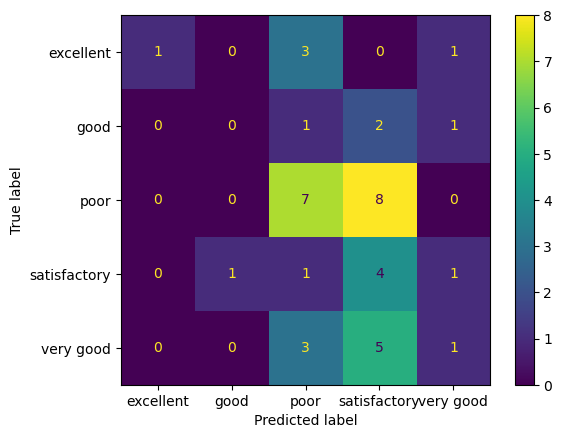

In [61]:
#
# Your code to display confusion matrix between predicted output and actual output
#
#


cm = confusion_matrix(y_test, y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = classifier.classes_)
disp.plot()
plt.show()



# Earlier, we used rfb Kernel. Now, we will test other kernels too.

# We will test on ['linear', 'poly', 'rbf', 'sigmoid' ] kernels.

In [62]:
# Create a list kernels with values ['linear', 'poly', 'rbf', 'sigmoid' ]

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Create an empty list accuracy

accuracy = []

# Which Kernel function is giving you best accuracy?

# Next - Develop KNN and Losgistic regression classifiers for this dataset.

In [63]:
#
# Develop KNN-based classifier. Use number of neigbours of your choice
#
for kernel in kernels:
    
    # Your code to compare the classifier for different Kernesls

    classifier = SVC(kernel = kernel)
    classifier.fit(X_train, y_train)
    
    test_pred = classifier.predict(X_test)
    
    test_score = accuracy_score(y_test, test_pred)
    
    accuracy.append(test_score)
    

In [64]:
accuracy

[0.35, 0.375, 0.325, 0.35]

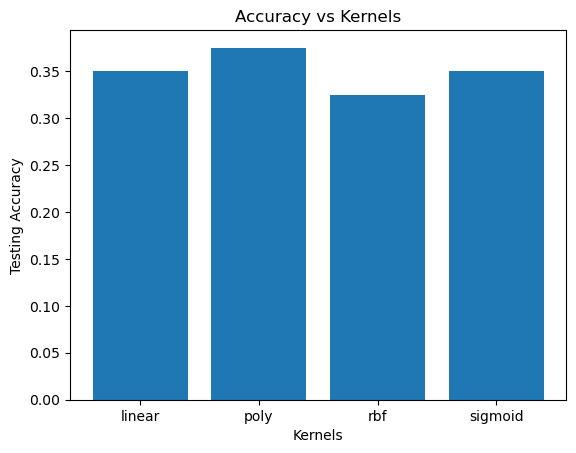

In [65]:
# Your code to plot accuracy vs kernels

plt.title('Accuracy vs Kernels')    

plt.bar(kernels, accuracy)

plt.xlabel('Kernels')
plt.ylabel('Testing Accuracy')

plt.show()



In [66]:
# add accuracy value for SVM

test_scores_models.append(accuracy[1])
test_scores_models

[0.325, 0.375]

In [67]:
# add model to the list

models.append('SVM(Poly)')
models

['SVM(rbf)', 'SVM(Poly)']

# Evaluate KNN for accuracy, precision, recall, f-score, and classification report on test data.

In [ ]:
#
#
# Your code to evaluate the classifer on test data
#
#

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [69]:
# Develop KNN-based classifier. Use number of neigbours of your choice


knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [70]:
# Your code to evaluate the classifer on test data
 
y_pred = knn.predict(X_test)

print("Accuracy test set: ", accuracy_score(y_test, y_pred))

print("Precision test set: ", precision_score(y_test, y_pred, average = 'micro' )) 
print("Recall test set: ", recall_score(y_test, y_pred, average = 'micro' ))
print("F-score test set: ", f1_score(y_test, y_pred, average = 'micro' ))

print(classification_report(y_test, y_pred)) 

Accuracy test set:  0.325
Precision test set:  0.325
Recall test set:  0.325
F-score test set:  0.325
              precision    recall  f1-score   support

   excellent       1.00      0.40      0.57         5
        good       0.17      0.25      0.20         4
        poor       0.44      0.47      0.45        15
satisfactory       0.15      0.29      0.20         7
   very good       0.33      0.11      0.17         9

    accuracy                           0.33        40
   macro avg       0.42      0.30      0.32        40
weighted avg       0.41      0.33      0.33        40



In [71]:
# add accuracy value for k-NN

test_scores_models.append(accuracy_score(y_test, y_pred))
test_scores_models

[0.325, 0.375, 0.325]

In [72]:
# add model to the list

models.append('k-NN')
models

['SVM(rbf)', 'SVM(Poly)', 'k-NN']

# Evaluate KNN for accuracy, precision, recall, f-score, and classification report on train data.



In [73]:
#
#
# Your code to evaluate the classifer on train data


train_data_predictions = knn.predict(X_train)

print("Accuracy train set: ", accuracy_score(y_train, train_data_predictions))
print("Precision train set: ", precision_score(y_train, train_data_predictions, average = 'micro' ))
print("Recall train set: ", recall_score(y_train, train_data_predictions, average = 'micro' ))
print("F-score train set: ", f1_score(y_train, train_data_predictions, average = 'micro' ))

print(classification_report(y_train, train_data_predictions))
#

Accuracy train set:  0.5014084507042254
Precision train set:  0.5014084507042254
Recall train set:  0.5014084507042254
F-score train set:  0.5014084507042254
              precision    recall  f1-score   support

   excellent       0.43      0.43      0.43        35
        good       0.49      0.38      0.43        58
        poor       0.55      0.70      0.62       115
satisfactory       0.51      0.47      0.49        96
   very good       0.38      0.29      0.33        51

    accuracy                           0.50       355
   macro avg       0.47      0.46      0.46       355
weighted avg       0.49      0.50      0.49       355



# Display confusion matric between predicted and actual values.

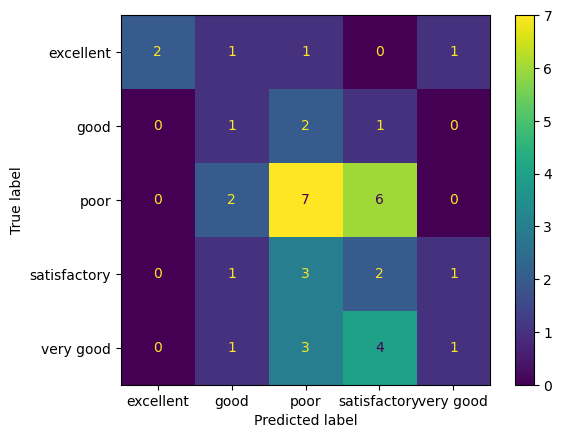

In [74]:
# Your code to display confusion matrix

cm = confusion_matrix(y_test, y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = classifier.classes_)
disp.plot()
plt.show()

# Develop Logistic Regression-based classifier.

In [75]:
# Your code to develop logistic regression-based classifier

logisticRegression =  LogisticRegression(random_state = 0)
logisticRegression.fit(X_train, y_train)

LogisticRegression(random_state=0)

# Evaluate Logistic Regression for accuracy, precision, recall, f-score, and classification report on test data.

In [76]:
# Your code to evaluate the logistic regression classifier on test data

# Your code to evaluate the classifer on test data
 
y_pred = logisticRegression.predict(X_test)

print("Accuracy test set: ", accuracy_score(y_test, y_pred))

print("Precision test set: ", precision_score(y_test, y_pred, average = 'micro' )) 
print("Recall test set: ", recall_score(y_test, y_pred, average = 'micro' ))
print("F-score test set: ", f1_score(y_test, y_pred, average = 'micro' ))

print(classification_report(y_test, y_pred)) 

Accuracy test set:  0.375
Precision test set:  0.375
Recall test set:  0.375
F-score test set:  0.375
              precision    recall  f1-score   support

   excellent       0.50      0.40      0.44         5
        good       0.14      0.25      0.18         4
        poor       0.60      0.40      0.48        15
satisfactory       0.27      0.43      0.33         7
   very good       0.38      0.33      0.35         9

    accuracy                           0.38        40
   macro avg       0.38      0.36      0.36        40
weighted avg       0.43      0.38      0.39        40



In [77]:
# add accuracy value for logistic Regression

test_scores_models.append(accuracy_score(y_test, y_pred))
test_scores_models

[0.325, 0.375, 0.325, 0.375]

In [78]:
# add model to the list

models.append('logistic Regression')
models

['SVM(rbf)', 'SVM(Poly)', 'k-NN', 'logistic Regression']

# Evaluate Logistic regression for accuracy, precision, recall, f-score, and classification report on train data.

In [79]:
# Your code to evaluate the logistic regression classifier on train data

train_data_predictions = logisticRegression.predict(X_train)

print("Accuracy train set: ", accuracy_score(y_train, train_data_predictions))
print("Precision train set: ", precision_score(y_train, train_data_predictions, average = 'micro' ))
print("Recall train set: ", recall_score(y_train, train_data_predictions, average = 'micro' ))
print("F-score train set: ", f1_score(y_train, train_data_predictions, average = 'micro' ))

print(classification_report(y_train, train_data_predictions))

Accuracy train set:  0.5070422535211268
Precision train set:  0.5070422535211268
Recall train set:  0.5070422535211268
F-score train set:  0.5070422535211268
              precision    recall  f1-score   support

   excellent       0.59      0.46      0.52        35
        good       0.50      0.28      0.36        58
        poor       0.56      0.65      0.60       115
satisfactory       0.47      0.51      0.49        96
   very good       0.42      0.47      0.44        51

    accuracy                           0.51       355
   macro avg       0.51      0.47      0.48       355
weighted avg       0.51      0.51      0.50       355



# Display confusion matrix between predicted and actual values for logistic regression.

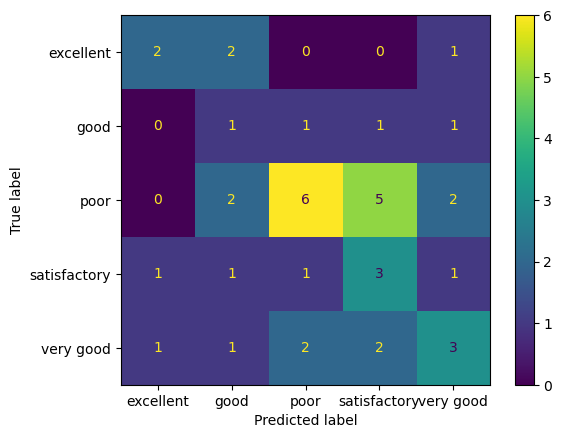

In [80]:
# Your code to display confusion matrix for logistic regression

cm = confusion_matrix(y_test, y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = classifier.classes_)
disp.plot()
plt.show()

Next, compare the accuracy, precision, recall, and F-score for all the classifiers using plots. You need to have only one plot rather than 4 different plots for 4 different meteruces.

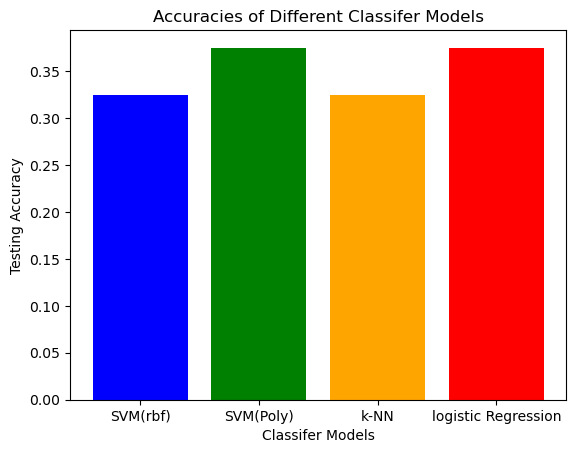

In [83]:
# Your code to plot and compare the performance of different algorithm

# Your code to plot accuracy vs kernels

plt.title('Accuracies of Different Сlassifer Models')    

plt.bar(models, test_scores_models, color=['blue', 'green', 'orange', 'red'])


plt.xlabel('Сlassifer Models')
plt.ylabel('Testing Accuracy')

plt.show()



In [84]:
test_scores_models

[0.325, 0.375, 0.325, 0.375]

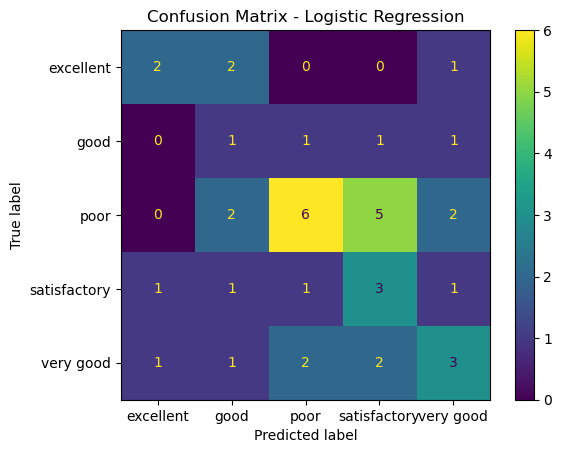

Best-Performing Algorithm: Logistic Regression
Accuracy of Logistic Regression: 0.375


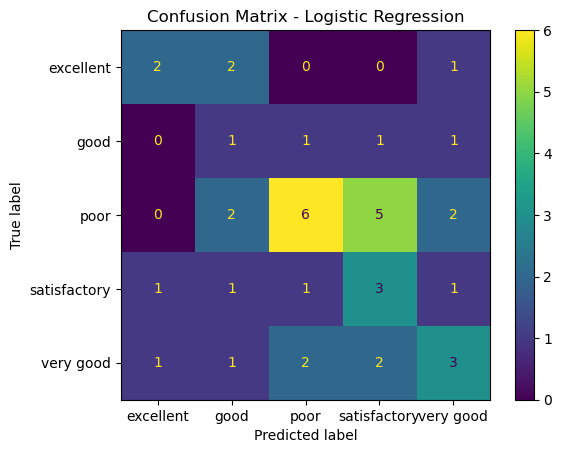

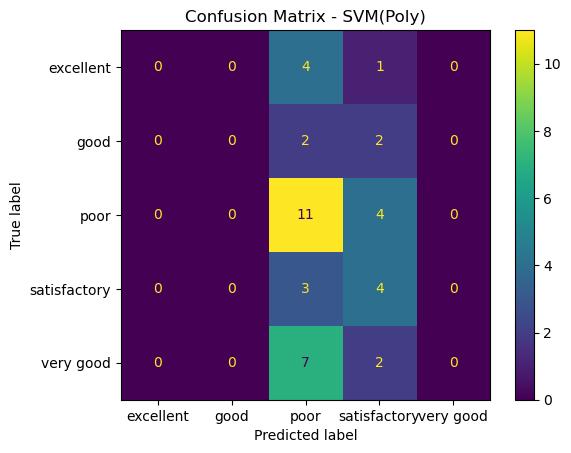

Best-Performing Algorithm: Logistic Regression
Accuracy of Logistic Regression: 0.375
Least-Performing Algorithm: SVM(Poly)
Accuracy of SVM(Poly): 0.375


In [95]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Logistic Regression
logistic_regression = LogisticRegression(random_state=0)
logistic_regression.fit(X_train, y_train)
logistic_pred = logistic_regression.predict(X_test)

# SVM(Poly)
svm_poly = SVC(kernel='poly')
svm_poly.fit(X_train, y_train)
svm_poly_pred = svm_poly.predict(X_test)


accuracy_logistic = accuracy_score(y_test, logistic_pred)
accuracy_svm_poly = accuracy_score(y_test, svm_poly_pred)

best_algorithm = logistic_regression if accuracy_logistic >= accuracy_svm_poly else svm_poly
least_algorithm = logistic_regression if accuracy_logistic < accuracy_svm_poly else svm_poly

best_algorithm_name = "Logistic Regression" if best_algorithm == logistic_regression else "SVM(Poly)"
least_algorithm_name = "Logistic Regression" if least_algorithm == logistic_regression else "SVM(Poly)"


def analyze_confusion_matrix(y_true, y_pred, classifier_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
    disp.plot()
    plt.title(f"Confusion Matrix - {classifier_name}")
    plt.show()


analyze_confusion_matrix(y_test, best_algorithm.predict(X_test), best_algorithm_name)


analyze_confusion_matrix(y_test, least_algorithm.predict(X_test), least_algorithm_name)


print(f"Best-Performing Algorithm: {best_algorithm_name}")
print(f"Accuracy of {best_algorithm_name}: {max(accuracy_logistic, accuracy_svm_poly)}")

print(f"Least-Performing Algorithm: {least_algorithm_name}")
print(f"Accuracy of {least_algorithm_name}: {min(accuracy_logistic, accuracy_svm_poly)}")



### **Important - Document in your Lab Logbook**

# 1.   Include a plot comparing the performance of various algorithms.
# 2.    Specify the best-performing algorithm and indicate which category exhibits the best and least performance based on the confusion metrics.

